<a href="https://colab.research.google.com/github/ShivaKumarDande/Projects/blob/main/Assignment_1_DMT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
import pandas as pd

# Function to read .dat file with specified encoding
def read_dat_file(file_path, encoding='ISO-8859-1'):
    return pd.read_csv(file_path, sep='::', engine='python', names=['MovieID', 'Title', 'Genres'], encoding=encoding)

# Read and process the movies file with different encoding
movies = read_dat_file('/content/movies.dat')
movies['Genres'] = movies['Genres'].apply(lambda x: x.split('|'))

# Read and process the ratings file
ratings = pd.read_csv('/content/ratings.dat', sep='::', engine='python', names=['UserID', 'MovieID', 'Rating', 'Timestamp'])

# Read and process the users file
users = pd.read_csv('/content/users.dat', sep='::', engine='python', names=['UserID', 'Gender', 'Age', 'Occupation', 'Zip-code'])
male_users_above_25 = users[(users['Gender'] == 'M') & (users['Age'] > 25)]['UserID']

# Filter ratings by male users above 25
filtered_ratings = ratings[ratings['UserID'].isin(male_users_above_25)]

# Explode the genres for aggregation
movies_exploded = movies.explode('Genres')

# Merge the datasets
merged_data = pd.merge(filtered_ratings, movies_exploded, on='MovieID')

# Aggregate ratings by genre
genre_ratings = merged_data.groupby('Genres')['Rating'].mean()

# Display the results
print("An aggregate of movie ratings by men of age above 25 for each genre:\n",genre_ratings)


An aggregate of movie ratings by men of age above 25 for each genre:
 Genres
Action         3.554547
Adventure      3.538637
Animation      3.721569
Children's     3.475314
Comedy         3.565456
Crime          3.764249
Documentary    3.950192
Drama          3.812309
Fantasy        3.490408
Film-Noir      4.117140
Horror         3.241089
Musical        3.700242
Mystery        3.759347
Romance        3.659748
Sci-Fi         3.509693
Thriller       3.644025
War            3.940634
Western        3.708494
Name: Rating, dtype: float64


# New Section

In [58]:
# Merge the datasets
merged_data = pd.merge(ratings, movies, on='MovieID')

# Count the number of ratings for each movie and sort
top_movies = merged_data.groupby('Title').size().sort_values(ascending=False).head(5)

# Display the results
print("The top 5 ranked movies by the most number of ratings\n", top_movies)

The top 5 ranked movies by the most number of ratings
 Title
American Beauty (1999)                                   3428
Star Wars: Episode IV - A New Hope (1977)                2991
Star Wars: Episode V - The Empire Strikes Back (1980)    2990
Star Wars: Episode VI - Return of the Jedi (1983)        2883
Jurassic Park (1993)                                     2672
dtype: int64


In [59]:
# Define age groups
age_bins = [0, 18, 30, 50, 70, float('inf')]
age_labels = ['<18', '18-30', '30-50', '50-70', '>70']
users['AgeGroup'] = pd.cut(users['Age'], bins=age_bins, labels=age_labels, right=False)

# Merge and group by AgeGroup
merged_data = pd.merge(ratings, users, on='UserID')
age_group_ratings = merged_data.groupby('AgeGroup')['Rating'].mean()

print(age_group_ratings)

AgeGroup
<18      3.549520
18-30    3.533299
30-50    3.624050
50-70    3.732677
>70           NaN
Name: Rating, dtype: float64


In [60]:
# Extract year from movie titles
movies['Year'] = movies['Title'].str.extract(r'\((\d{4})\)')

# Filter movies released in the year 2000
movies_2000 = movies[movies['Year'] == '2000']

# Merge datasets
merged_data = pd.merge(pd.merge(movies_2000, ratings, on='MovieID'), users, on='UserID')

# Define age groups
age_groups = {'Under 18': [0, 18], '19 to 45': [19, 45], 'Above 45': [46, 150]}

# Count unique movies rated by each age group
unique_movies_rated = {}
for group, ages in age_groups.items():
    age_filtered = merged_data[(merged_data['Age'] >= ages[0]) & (merged_data['Age'] <= ages[1])]
    unique_movies_count = age_filtered['MovieID'].nunique()
    unique_movies_rated[group] = unique_movies_count

print(unique_movies_rated)

{'Under 18': 145, '19 to 45': 147, 'Above 45': 131}


In [61]:
def find_similarly_rated_movies(user_id, movie_id):
    """ Find movies rated similarly by the same user. """
    try:
        user_rating = ratings[(ratings['UserID'] == user_id) & (ratings['MovieID'] == movie_id)]['Rating'].iloc[0]
        similarly_rated = ratings[(ratings['UserID'] == user_id) & (ratings['Rating'] == user_rating) & (ratings['MovieID'] != movie_id)]
        return similarly_rated['MovieID'].tolist()
    except IndexError:
        return "Rating not found for this user and movie combination."

# Example usage
print(find_similarly_rated_movies(1, 3408))  # Replace with actual IDs


[594, 919, 938, 2398, 2918, 2791, 2018, 2797, 1097, 1721, 1545, 2294, 3186, 1566, 588, 1907, 783, 2762, 1962, 2692, 260, 1207, 531, 3114, 608, 1246]


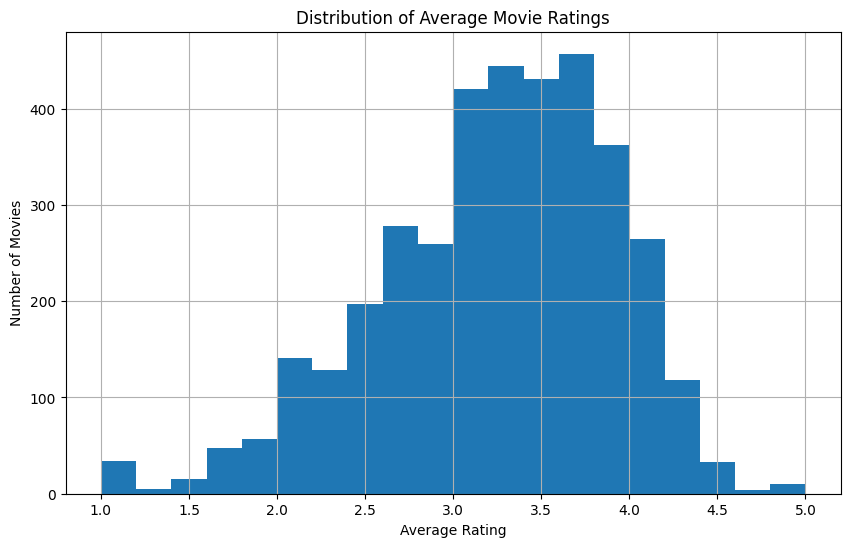

In [62]:
import matplotlib.pyplot as plt

# Calculate average rating for each movie
average_ratings = ratings.groupby('MovieID')['Rating'].mean()

# Convert Series to DataFrame
average_ratings_df = average_ratings.to_frame().reset_index()

# Join with movies data to get titles
average_ratings_df = average_ratings_df.join(movies.set_index('MovieID'), on='MovieID')

# Plot
plt.figure(figsize=(10, 6))
average_ratings_df['Rating'].hist(bins=20)
plt.title('Distribution of Average Movie Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Number of Movies')
plt.show()


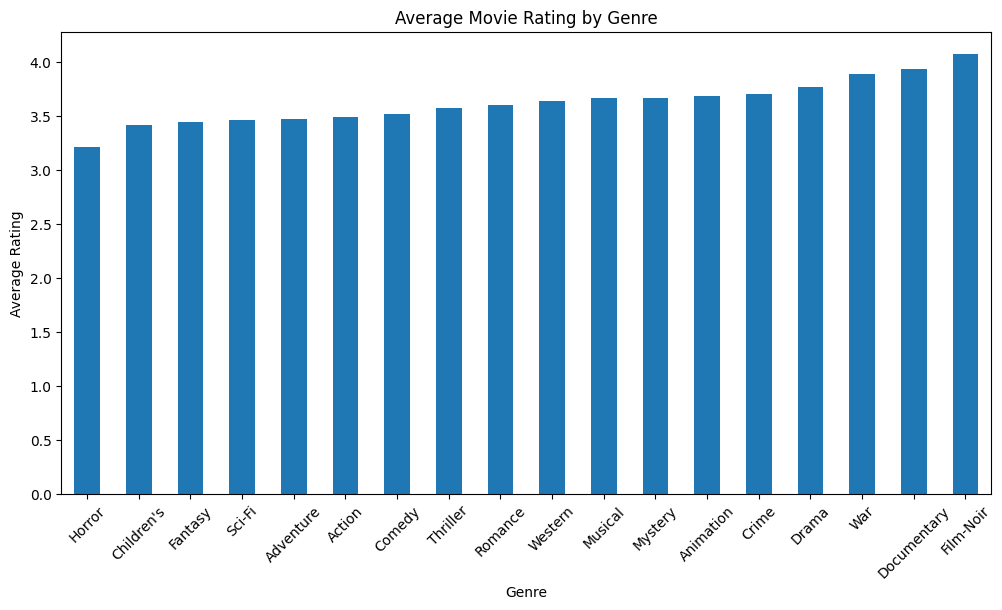

In [68]:
import pandas as pd
import matplotlib.pyplot as plt

# Function to read .dat file
def read_dat_file(file_path, names, encoding='ISO-8859-1'):
    return pd.read_csv(file_path, sep='::', engine='python', names=names, encoding=encoding)

# Read data
movies = read_dat_file('movies.dat', names=['MovieID', 'Title', 'Genres'])
ratings = read_dat_file('ratings.dat', names=['UserID', 'MovieID', 'Rating', 'Timestamp'])

# Convert 'Genres' to string and handle missing values
movies['Genres'] = movies['Genres'].astype(str)

# Split and explode genres
movies['Genres'] = movies['Genres'].str.split('|')
exploded_genres = movies.explode('Genres')

# Merge datasets
merged_data = pd.merge(ratings, exploded_genres, on='MovieID')

# Calculate average rating for each genre
avg_ratings_per_genre = merged_data.groupby('Genres')['Rating'].mean().sort_values()

# Plot
plt.figure(figsize=(12, 6))
avg_ratings_per_genre.plot(kind='bar')
plt.title('Average Movie Rating by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()


In [76]:
print("Observation from the above bar chart")

Observation from the above bar chart


In [75]:
print("The bar chart shows that people tend to rate movies from all genres pretty similarly, \nwith no one genre standing out as really bad or really good. Horror movies got slightly lower ratings, \nwhich might mean they're not as popular, or they just get tougher reviews. \nDocumentaries scored a bit higher, suggesting that the people who watch them really like them. \nOverall, most movie ratings are around the middle range, not too high or too low.")

The bar chart shows that people tend to rate movies from all genres pretty similarly, 
with no one genre standing out as really bad or really good. Horror movies got slightly lower ratings, 
which might mean they're not as popular, or they just get tougher reviews. 
Documentaries scored a bit higher, suggesting that the people who watch them really like them. 
Overall, most movie ratings are around the middle range, not too high or too low.
